# Assignment 1: Descriptive Statistics and Probability Theory

**submitted by Sreekanth Potlabathini(220088993)**

-------------------------------------------------------------------

**Content** 

step 1: Importing libraries & data set 

step 2: Working with the data

step 3: Understand outliers and see if they can be removed

step 4: Removing duplicates & non-useful data 

step 5: Complete the data- fill missing values

step 6: Questions & Answers + Data Analysis results

-------------------------------------------------------------------

step 1: Importing libraries & data set

In [1029]:
# Importing the required libraries for handling dataframes & graphs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing the dataset 'sales.csv file for the analysis
df = pd.read_csv(r'C:\Users\srika\OneDrive\Documents\York\Sem-1 york\MBAN 6110 - Data Science 1\Assignment 1\sales_data.csv')


step 2: Working with the data

In [1030]:

# Data is import.
# Understanding the data 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      946 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  946 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


we can see that the total data is around 1050 in Sate date but every other value is missing few details.

From the above, we can see for the 'units sold' the mean and 50% are very near. Hence it is normally distributed and we can use the data for further analysis.

We have filled the missing values in product & Region.
for filling price and Units sold we can use mean value or null value based on the distribution. 

we can add a mean value of price and sales for missing values in out dataframe but that would cause issue when we run analysis based on Product or region

hence, the missing  values of price and sales needs to be '0' and we can look for more info to remove them if they become the outliers.


In [1031]:
# renaming Units for easy typing
df=df.rename(columns={'Units Sold':'Units'})
df=df.rename(columns={'Sale Date':'Date'})
df.describe(include='all')

,Product,Region,Price,Units,Date
count,947,946,945.000000,946.000000,1050
unique,50,10,NaN,NaN,1000
top,Product_45,Region_9,NaN,NaN,2022-07-28
freq,28,109,NaN,NaN,2
mean,NaN,NaN,107.598688,10.048626,NaN
std,NaN,NaN,124.020322,3.172261,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,29.430000,8.000000,NaN
50%,NaN,NaN,78.130000,10.000000,NaN
75%,NaN,NaN,142.570000,12.000000,NaN


we have 51 unique products as per the info above and 11 Regions

plotting graphs based the info presented can help us identify the outlier and remove them

we need to clean the data for removing outliers for analysis the sales

step 3: Complete the data- fill missing values

 Removing duplicates & fill missing values

In [1032]:
# removing the duplicates
df.drop_duplicates(inplace=True)

In [1033]:
# filling in the missing values in Product and Region with 'Others'
df['Product']=df['Product'].fillna('Other')
df['Region']=df['Region'].fillna('Other')

step 3: Understand outliers and see if they can be removed

<!-- looking at the above graph it isbetter to remove missing values to make it more normally distributed. chances of missing-out on usefull information if all are removed hence we use a copy function to a different dataset to protect information. -->

<Axes: xlabel='Units', ylabel='Price'>

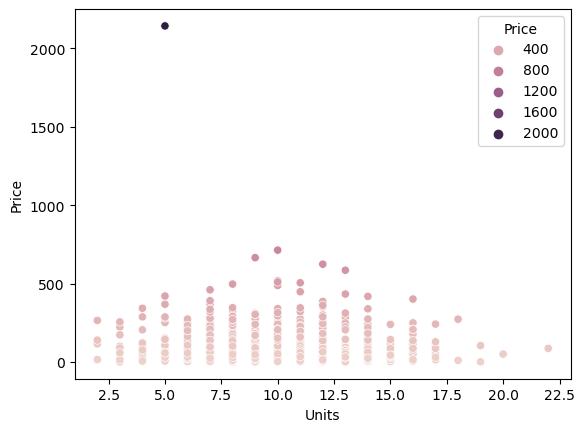

In [1034]:
sns.scatterplot(data=df,x='Units',y='Price',hue='Price')

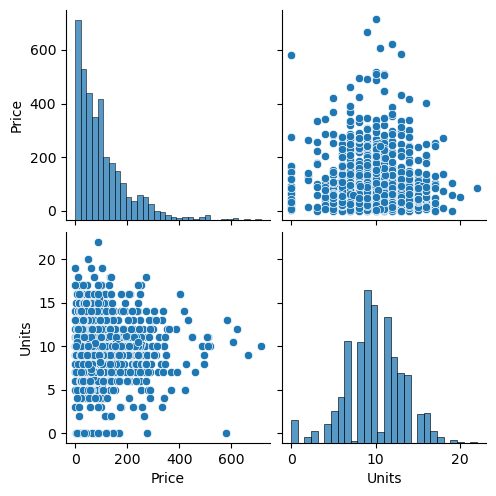

In [1035]:

# removing outlier which is too high of a vlue Units sold and could  be a entry error.
# fromt he aove graph we can see that there is one outlier whose price is greater than 2000
df.drop(df[df['Price']>2000].index,axis=0,inplace=True)



# DFwill be iuputted with mean value is identifed as the best data cleaning process
mean_prices = df.groupby(['Product', 'Region'])['Price'].mean()
mean_units = df.groupby(['Product', 'Region'])['Units'].mean()

df['Price'].fillna(df.groupby(['Product', 'Region'])['Price'].transform('mean'), inplace=True)
df['Units'].fillna(df.groupby(['Product', 'Region'])['Units'].transform('mean'), inplace=True)

df['Price']=df['Price'].fillna(0)
df['Units']=df['Units'].fillna(0)


sns.pairplot(data=df)

out of the both df2 looks much better with more information and the graph is nort very distorted so can be used.

In [1036]:
df.describe(include='all')

,Product,Region,Price,Units,Date
count,999,999,999.000000,999.000000,999
unique,51,11,NaN,NaN,999
top,Other,Region_9,NaN,NaN,2022-01-01
freq,100,104,NaN,NaN,1
mean,NaN,NaN,104.086688,9.827923,NaN
std,NaN,NaN,103.353543,3.385938,NaN
min,NaN,NaN,0.000000,0.000000,NaN
25%,NaN,NaN,29.245000,8.000000,NaN
50%,NaN,NaN,77.820000,10.000000,NaN
75%,NaN,NaN,139.555000,12.000000,NaN


In [1037]:
# the data looks complete 
# staring the analysis to get information
# creating a new column for income earned from selling the product
# Price x Units = sales
df.reset_index(drop=True, inplace=True)

df['sales'] = df['Price']*df['Units']

#converting date to a readable format:
df['Date'] = pd.to_datetime(df['Date'])

<Axes: >

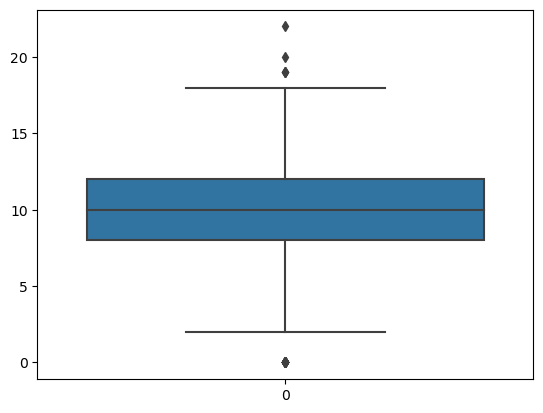

In [1038]:
sns.boxplot(df['Units']) 

<Axes: >

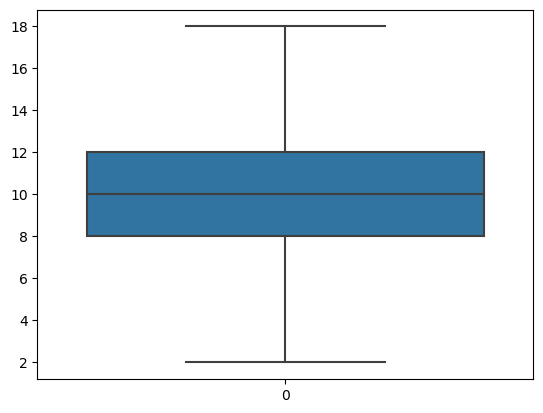

In [1039]:
# removing outliers 
df.drop(df[df['Units'] ==0].index,axis=0,inplace=True)
df.drop(df[df['Units'] >=19].index,axis=0,inplace=True)
sns.boxplot(df['Units']) 

<Axes: >

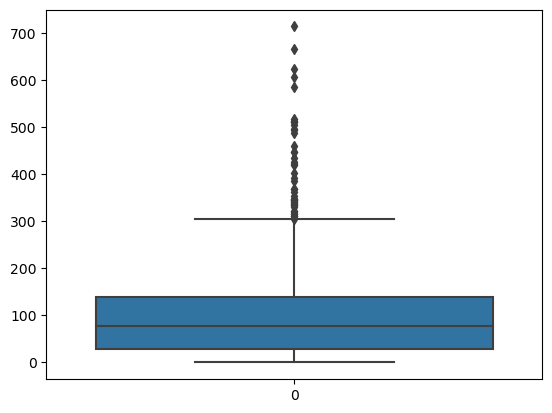

In [1040]:
sns.boxplot(df['Price']) 

need to look at other relations to remove price. but for now we can safely consider removing above 550.

<Axes: >

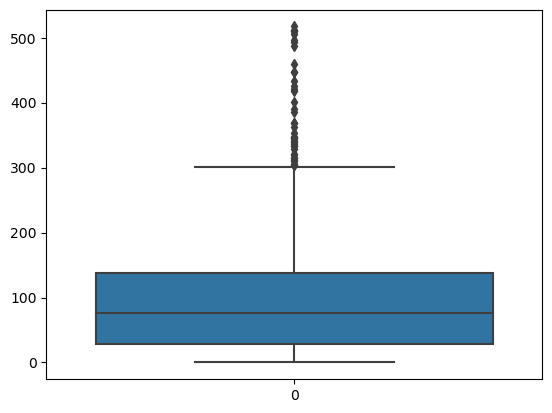

In [1041]:
# removing outliers 
df.drop(df[df['Price'] >=550].index,axis=0,inplace=True)
sns.boxplot(df['Price']) 

<Axes: xlabel='Region', ylabel='Units'>

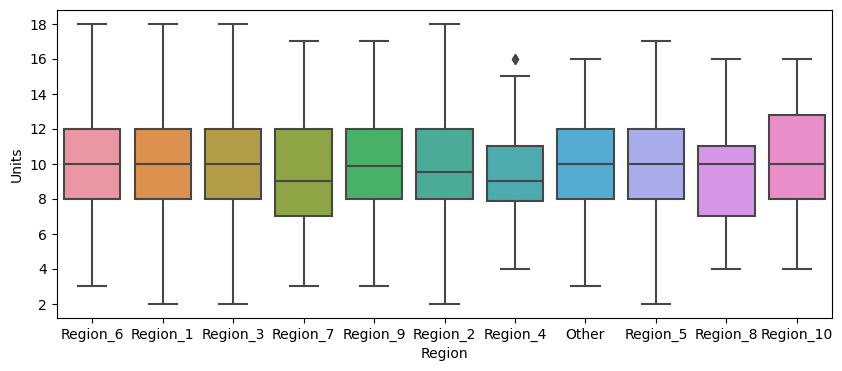

In [1042]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.boxplot(x='Region',y='Units',data=df,ax=ax)


from the above we can remove the outlier units which is greater than 20 units

<Axes: xlabel='Region', ylabel='Units'>

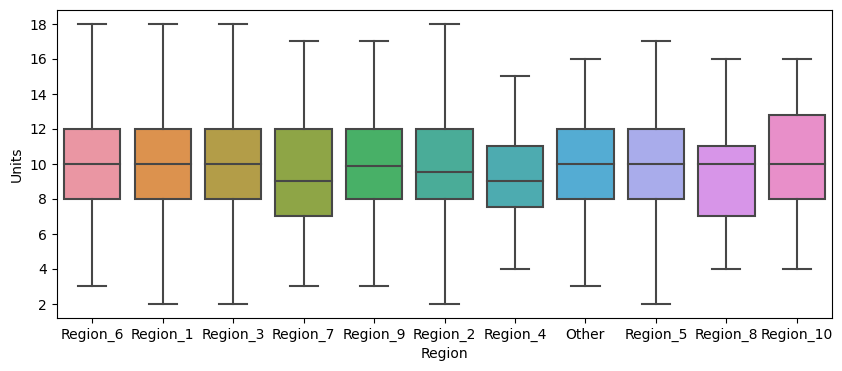

In [1043]:
# trimmming the outliers to make better predictions
df.drop(df[(df['Region'] == 'Region_4') & (df['Units'] == df.loc[df['Region'] == 'Region_4', 'Units'].max())].index,axis=0,inplace=True)
# verifing new boxplot
fig, ax = plt.subplots(figsize=(10, 4))
sns.boxplot(x='Region',y='Units',data=df,ax=ax)


C:\Users\srika\AppData\Local\Temp\ipykernel_11428\976171415.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


<Axes: xlabel='Product', ylabel='Units'>

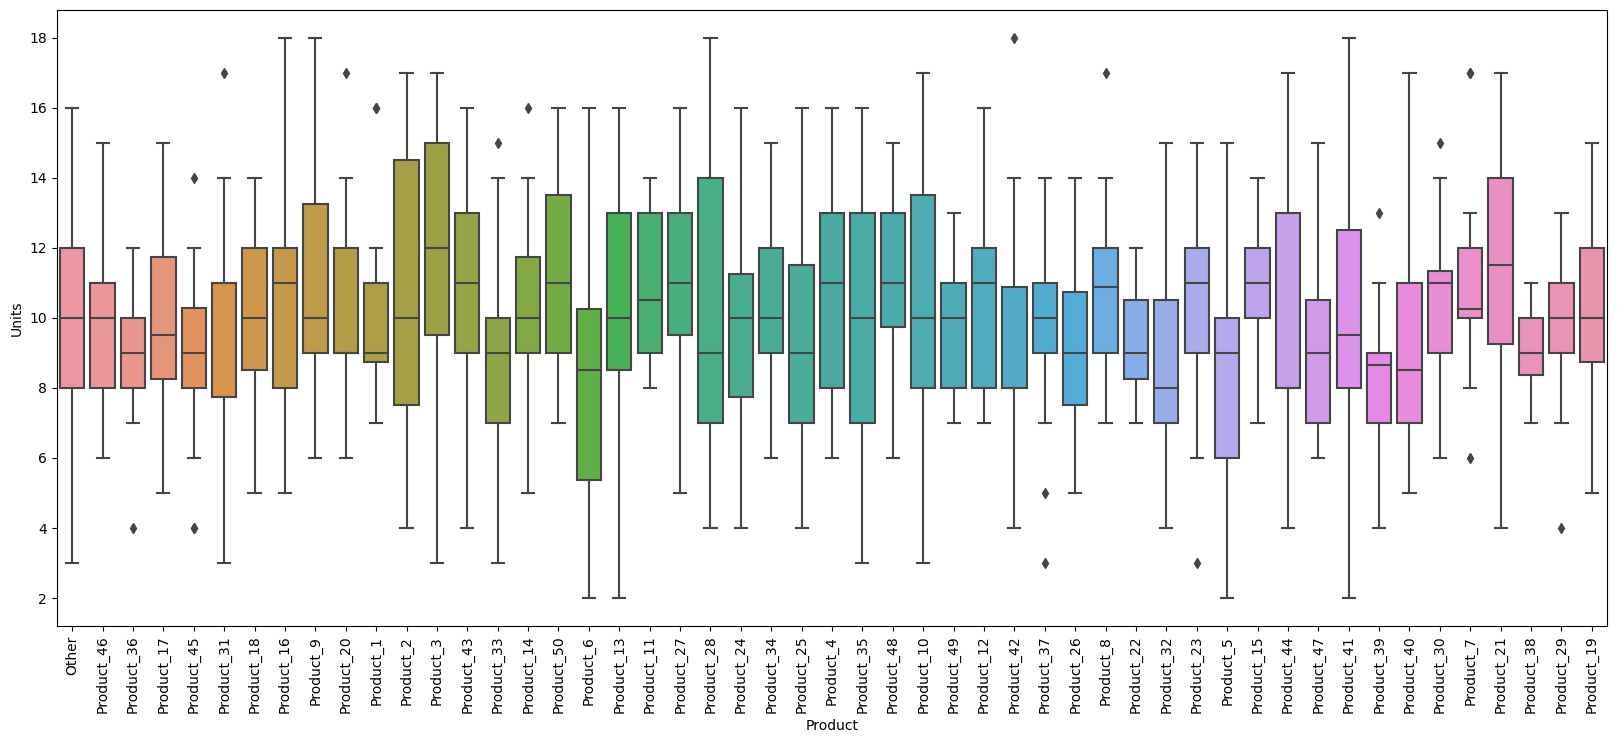

In [1044]:
fig, ax = plt.subplots(figsize=(20,8))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
sns.boxplot(x='Product',y='Units',data=df,ax=ax)


C:\Users\srika\AppData\Local\Temp\ipykernel_11428\2476404707.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


<Axes: xlabel='Product', ylabel='Units'>

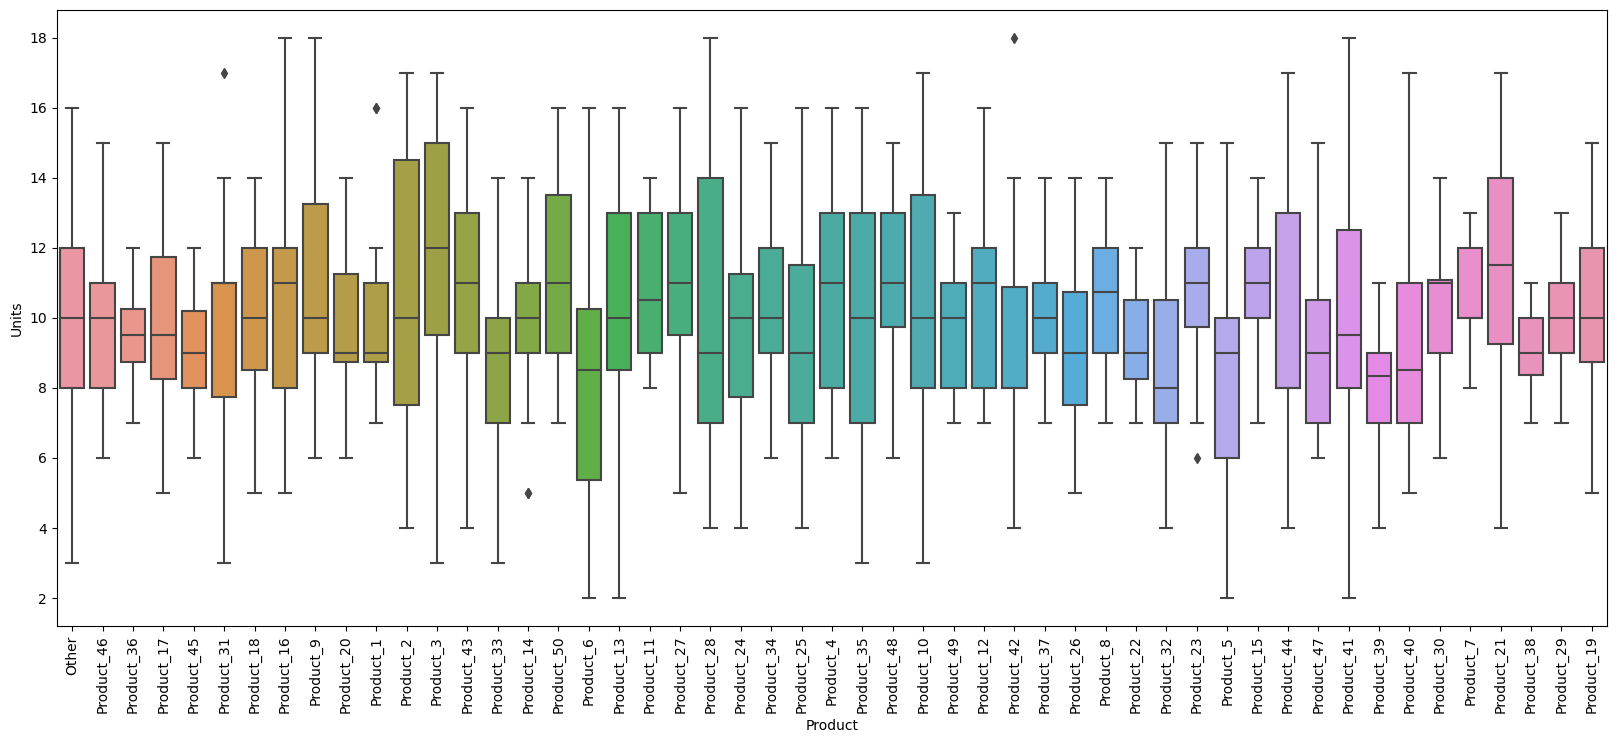

In [1045]:
# trimmming the outliers to make better predictions
df.drop(df[(df['Product'] == 'Product_36') & (df['Units'] == df.loc[df['Product'] == 'Product_36', 'Units'].min())].index,axis=0,inplace=True)
df.drop(df[(df['Product'] == 'Product_45') & (df['Units'] == df.loc[df['Product'] == 'Product_45', 'Units'].min())].index,axis=0,inplace=True)
df.drop(df[(df['Product'] == 'Product_45') & (df['Units'] == df.loc[df['Product'] == 'Product_45', 'Units'].max())].index,axis=0,inplace=True)
df.drop(df[(df['Product'] == 'Product_20') & (df['Units'] == df.loc[df['Product'] == 'Product_20', 'Units'].max())].index,axis=0,inplace=True)
df.drop(df[(df['Product'] == 'Product_33') & (df['Units'] == df.loc[df['Product'] == 'Product_33', 'Units'].max())].index,axis=0,inplace=True)
df.drop(df[(df['Product'] == 'Product_14') & (df['Units'] == df.loc[df['Product'] == 'Product_14', 'Units'].max())].index,axis=0,inplace=True)
df.drop(df[(df['Product'] == 'Product_8') & (df['Units'] == df.loc[df['Product'] == 'Product_8', 'Units'].max())].index,axis=0,inplace=True)
df.drop(df[(df['Product'] == 'Product_37') & (df['Units'] == df.loc[df['Product'] == 'Product_37', 'Units'].min())].index,axis=0,inplace=True)
df.drop(df[(df['Product'] == 'Product_37') & (df['Units'] == df.loc[df['Product'] == 'Product_37', 'Units'].min())].index,axis=0,inplace=True)
df.drop(df[(df['Product'] == 'Product_23') & (df['Units'] == df.loc[df['Product'] == 'Product_23', 'Units'].min())].index,axis=0,inplace=True)
df.drop(df[(df['Product'] == 'Product_23') & (df['Units'] == df.loc[df['Product'] == 'Product_23', 'Units'].min())].index,axis=0,inplace=True)
df.drop(df[(df['Product'] == 'Product_39') & (df['Units'] == df.loc[df['Product'] == 'Product_39', 'Units'].max())].index,axis=0,inplace=True)
df.drop(df[(df['Product'] == 'Product_30') & (df['Units'] == df.loc[df['Product'] == 'Product_30', 'Units'].max())].index,axis=0,inplace=True)
df.drop(df[(df['Product'] == 'Product_7') & (df['Units'] == df.loc[df['Product'] == 'Product_7', 'Units'].max())].index,axis=0,inplace=True)
df.drop(df[(df['Product'] == 'Product_7') & (df['Units'] == df.loc[df['Product'] == 'Product_7', 'Units'].min())].index,axis=0,inplace=True)
df.drop(df[(df['Product'] == 'Product_29') & (df['Units'] == df.loc[df['Product'] == 'Product_29', 'Units'].min())].index,axis=0,inplace=True)

# verifing new boxplot
fig, ax = plt.subplots(figsize=(20,8))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
sns.boxplot(x='Product',y='Units',data=df,ax=ax)


In [1047]:
df.describe(include='all')

C:\Users\srika\AppData\Local\Temp\ipykernel_11428\2884002236.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,Product,Region,Price,Units,Date,sales
count,949,949,949.000000,949.000000,949,949.000000
unique,51,11,NaN,NaN,949,NaN
top,Other,Region_10,NaN,NaN,2022-01-01 00:00:00,NaN
freq,100,101,NaN,NaN,1,NaN
first,NaN,NaN,NaN,NaN,2022-01-01 00:00:00,NaN
last,NaN,NaN,NaN,NaN,2024-09-26 00:00:00,NaN
mean,NaN,NaN,101.085129,9.966907,NaN,995.174072
std,NaN,NaN,95.947268,2.942296,NaN,1009.141396
min,NaN,NaN,0.000000,2.000000,NaN,0.000000
25%,NaN,NaN,28.670000,8.000000,NaN,260.080000


C:\Users\srika\AppData\Local\Temp\ipykernel_11428\4077213738.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


<Axes: xlabel='Region', ylabel='Price'>

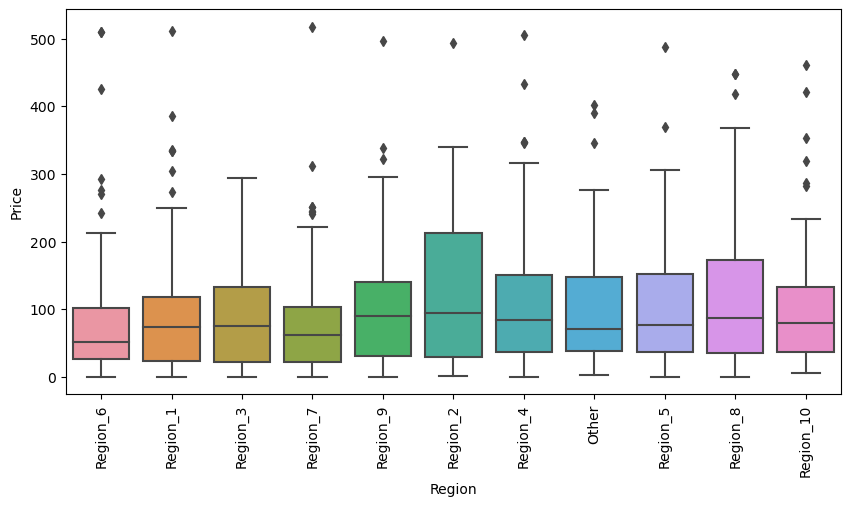

In [1048]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
sns.boxplot(x='Region',y='Price',data=df,ax=ax)

Removing Price greater than 350 to improve data

C:\Users\srika\AppData\Local\Temp\ipykernel_11428\2971342282.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


<Axes: xlabel='Region', ylabel='Price'>

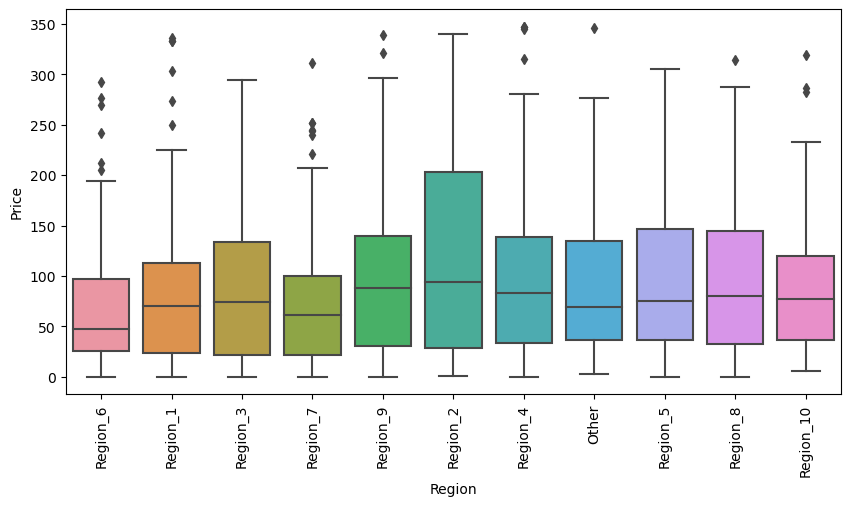

In [1049]:
df.drop(df[df['Price']>=350].index,axis=0,inplace=True)

# verifing new boxplot
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
sns.boxplot(x='Region',y='Price',data=df,ax=ax)

C:\Users\srika\AppData\Local\Temp\ipykernel_11428\158997619.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


<Axes: xlabel='Product', ylabel='Price'>

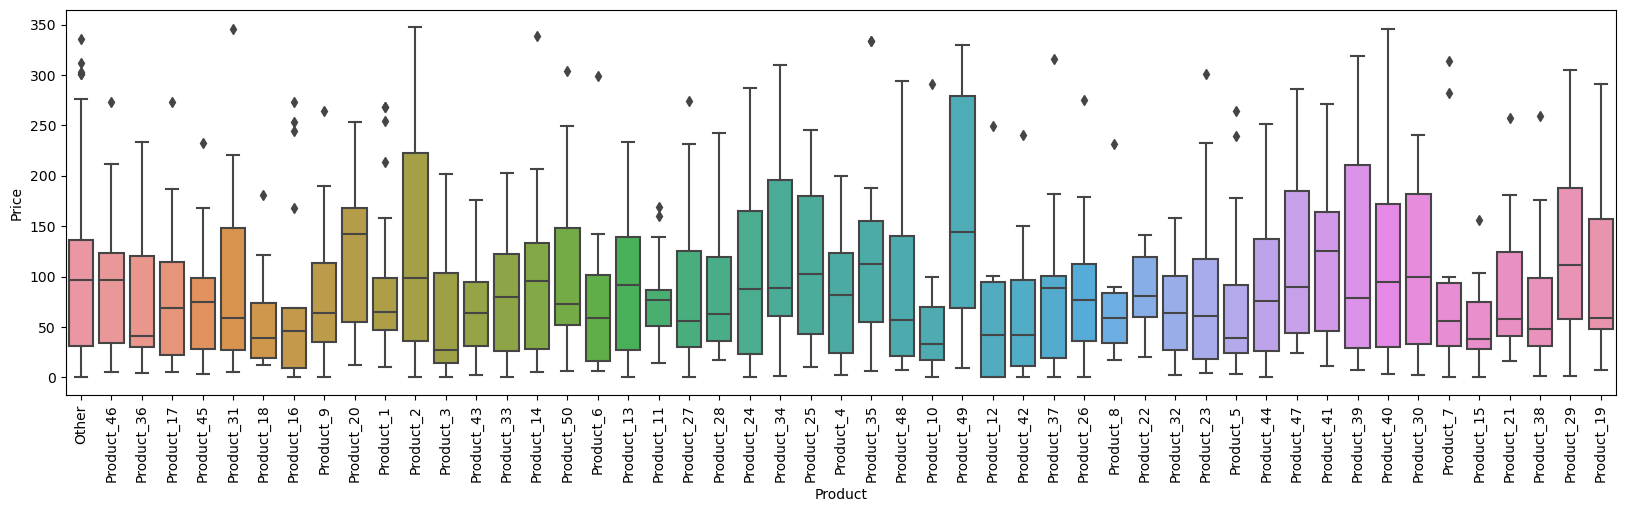

In [1050]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
sns.boxplot(x='Product',y='Price',data=df,ax=ax)

step 4: Removing duplicates

In [1054]:
# removing the duplicates
df.drop_duplicates(inplace=True)

In [1055]:
df.describe(include='all')

C:\Users\srika\AppData\Local\Temp\ipykernel_11428\2884002236.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,Product,Region,Price,Units,Date,sales
count,927,927,927.000000,927.000000,927,927.000000
unique,51,11,NaN,NaN,927,NaN
top,Other,Region_9,NaN,NaN,2022-01-01 00:00:00,NaN
freq,99,98,NaN,NaN,1,NaN
first,NaN,NaN,NaN,NaN,2022-01-01 00:00:00,NaN
last,NaN,NaN,NaN,NaN,2024-09-26 00:00:00,NaN
mean,NaN,NaN,93.004021,9.967201,NaN,914.474039
std,NaN,NaN,80.829935,2.947338,NaN,851.590449
min,NaN,NaN,0.000000,2.000000,NaN,0.000000
25%,NaN,NaN,28.190000,8.000000,NaN,255.875000


In [1056]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 927 entries, 0 to 998
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Product  927 non-null    object        
 1   Region   927 non-null    object        
 2   Price    927 non-null    float64       
 3   Units    927 non-null    float64       
 4   Date     927 non-null    datetime64[ns]
 5   sales    927 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 50.7+ KB


In [ ]:
# recommendation : 
# 1) identify the product to improve or drop (based on sales)
# 2) identify the region to improve or drop (based on sales)

# isolating each graph based on region & Product

dfp = df.groupby('Product')['sales'].sum().reset_index()
dfr = df.groupby('Region')['sales'].sum().reset_index()

sns.histplot(x='Region', y='sales', data=dfr,stat='count', bins=len(dfr),hue='sales')
# this graph has lot of outliers

to fins the region
dfp.sort_values('sales', axis=0, ascending=True, inplace=True)
dfr.sort_values('sales', axis=0, ascending=True, inplace=True)

sns.histplot(data=dfp,y='Product',x='sales')

In [ ]:
# sns.histplot(df['Units Sold'],bins=40)

# sns.histplot(df['Units'],bins=40)

In [ ]:
sns.histplot(data=dfp,y='Product',x='sales')

In [ ]:
# others is ruining the graph
dfp.drop(dfp[dfp['Product']=='Other'].index,axis=0,inplace=True)
sns.histplot(data=dfp,y='Product',x='sales')

In [ ]:
sns.histplot(data=dfr,y='Region',x='sales')

In [ ]:
sns.histplot(data=dfr,y='Region',x='sales')

In [ ]:
# we can reallocate resources from region 6&7 to conentrate on 9
# We can reallocate resources from Product 22,44,18,3,36,38,12 to conentrate on 26,29,50,48,30,31
# we should also lkook at introducing new products which have higher price since the relation of proiice and sales are co-related


In [ ]:
# testing the date info

In [ ]:
# Extract the year and month from the "Sale Date" column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Calculate total sales volume per month
monthly_sales = df.groupby(['Year', 'Month'])['Units'].sum()

# Plot the sales trends over time
monthly_sales.plot(kind='line', figsize=(10, 6), xlabel='Month', ylabel='Total Units Sold', title='Monthly Sales Trends')

In [ ]:
# seasional sales 
# Extract the month and season from the "Sale Date" column
df['Month'] = df['Date'].dt.month
df['Season'] = df['Date'].dt.quarter

# Calculate total sales volume per season
seasonal_sales = df.groupby('Season')['Units'].sum()

# Plot the seasonal sales analysis
seasonal_sales.plot(kind='bar', figsize=(10, 6), xlabel='Season', ylabel='Total Units Sold', title='Seasonal Sales Analysis')

In [ ]:
# Extract the weekday from the "Sale Date" column
df['Weekday'] = df['Date'].dt.weekday

# Calculate total sales volume per weekday
weekday_sales = df.groupby('Weekday')['Units'].sum().reset_index()

# Plot the sales by weekday analysis
# weekday_sales.plot(kind='bar', figsize=(10, 6), xlabel='Weekday', ylabel='Total Units Sold', title='Sales by Weekday Analysis')
sns.barplot(x='Weekday', y='Units', data=weekday_sales)


In [ ]:
sns.boxplot(data=df,x='Weekday',y='sales')

In [ ]:
# Extract the month and year from the "Sale Date" column
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Calculate total sales volume per month and year
monthly_yearly_sales = df.groupby(['Year', 'Month'])['Units'].sum()

# Plot the sales by month and year analysis
monthly_yearly_sales.unstack().plot(kind='line', figsize=(10, 6), xlabel='Month', ylabel='Total Units Sold', title='Sales by Month and Year Analysis')

In [ ]:
# Group the data by Sale Date and Product and calculate the total units sold
sales_product = df.groupby(['Date', 'Product'])['Units'].sum().unstack()

# Plot the line chart for each product
sales_product.plot(kind='line', figsize=(12, 6))
plt.xlabel('Date')
plt.ylabel('Total Units Sold')
plt.title('Date vs. Product')
plt.legend(loc='best')
plt.show()

In [ ]:
# Group the data by Sale Date and Region and calculate the total units sold
sales_region = df.groupby(['Date', 'Region'])['Units'].sum().unstack()

# Plot the line chart for each region
sales_region.plot(kind='line', figsize=(12, 6))
plt.xlabel('Date')
plt.ylabel('Total Units Sold')
plt.title('Sales Date vs. Region')
plt.legend(loc='best')
plt.show()

In [ ]:

# Group the data by Sale Date and Product and calculate the total units sold
sales_product = df.groupby(['Date'])['sales'].sum()

# Plot the line chart for each product
sales_product.plot(kind='line', figsize=(12, 6))
plt.xlabel('Date')
plt.ylabel('Total Units Sold')
plt.title('Sales Date vs. Product')
plt.legend(loc='best')
plt.show()

In [ ]:

# Group the data by Sale Date and Region and calculate the total units sold
sales_region = df.groupby(['Date', 'Region'])['Units'].sum().unstack()

# Get a list of unique regions
regions = sales_region.columns

# Create subplots for each region
fig, axes = plt.subplots(len(regions), 1, figsize=(12, 6 * len(regions)), sharex=True)

# Plot a line chart for each region
for i, region in enumerate(regions):
    sales_region[region].plot(kind='line', ax=axes[i])
    axes[i].set_ylabel('Total Units Sold')
    axes[i].set_title('Sales Date vs. Region: ' + region)

plt.xlabel('Date')
plt.tight_layout()
plt.show()

In [ ]:

# Group the data by Product and Region and calculate the total units sold
sales_region_product = df.groupby(['Product', 'Region'])['Units'].sum().unstack()

# Plot the bar chart
sales_region_product.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Product')
plt.ylabel('Total Units Sold')
plt.title('Product Sales by Region')
plt.legend(loc='best')
plt.show()

In [ ]:

# Group the data by Product and Region and calculate the total units sold
sales_region_product = df.groupby(['Region','Product'])['Units'].sum().unstack()

# Plot the stacked bar chart
sales_region_product.plot(kind='bar', stacked=True, figsize=(6, 6))
plt.ylabel('Product')
plt.xlabel('Total Units Sold')
plt.title('Product Sales by Region')
plt.legend(loc='best')
plt.show()

In [ ]:
df[(df['Units']<=3) & (df['sales']<=1000)]

the above information states which products in which region should be dropped due to low sales volume & low sales income

---------------------------------------------------------------------------------

step 6: Questions & Answers + Data Analysis results

1) What conclusions can you draw about sales performance of various products and regions?





2) What recommendations do you have for the business?

we can reallocate resources from region 6 & 7 to concentrate on 9

We can reallocate resources from Product 22, 44, 18, 3, 36, 38 & 12 to conentrate on 26, 29, 50, 48, 30 & 31

we should also look at introducing new products which have higher price since the relation of price and sales are co-related

3) Describe your data cleaning approach. How and why did you decide on which cleaning techniques to use?

for data cleaning 

In [ ]:
sns.scatterplot(x='Region',y='Season',data=df,size="Price",hue='Units')

In [ ]:
df